# Technology Portfolio

http://www.buschinvestments.com/Types-of-Bonds.c71.htm

## Tech Stocks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbols = ['TSLA','GOOGL','MSFT','NVDA']
start = '2011-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbols,start,end)['Adj Close']

# View Columns
df.head()

[*********************100%***********************]  4 of 4 downloaded


,GOOGL,MSFT,NVDA,TSLA
Date,,,,
2011-01-03,302.477478,22.558224,14.579863,26.620001
2011-01-04,301.361359,22.646908,14.533780,26.670000
2011-01-05,304.839844,22.574345,15.648929,26.830000
2011-01-06,307.057068,23.235449,17.814707,27.879999
2011-01-07,308.528534,23.058081,18.312376,28.240000


In [3]:
df.tail()

,GOOGL,MSFT,NVDA,TSLA
Date,,,,
2018-12-24,984.669983,93.074097,126.679031,295.390015
2018-12-26,1047.849976,99.431976,132.680054,326.089996
2018-12-27,1052.900024,100.045013,130.756119,316.130005
2018-12-28,1046.680054,99.263878,133.228302,333.869995
2018-12-31,1044.959961,100.430641,133.078781,332.799988


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
8 years


### Starting Cash with 100k to invest in Technology

In [5]:
Cash = 100000
print('Percentage of invest:')
percent_invest = [0.25, 0.25, 0.25, 0.25]
for i, x in zip(df.columns, percent_invest):
    cost = x * Cash
    print('{}: {}'.format(i, cost))

Percentage of invest:
GOOGL: 25000.0
MSFT: 25000.0
NVDA: 25000.0
TSLA: 25000.0


In [6]:
print('Number of Shares:')
percent_invest = [0.25, 0.25, 0.25, 0.25]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    print('{}: {}'.format(i, shares))

Number of Shares:
GOOGL: 82
MSFT: 1108
NVDA: 1714
TSLA: 939


In [7]:
print('Beginning Value:')
percent_invest = [0.25, 0.25, 0.25, 0.25]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    Begin_Value = round(shares * y, 2)
    print('{}: ${}'.format(i, Begin_Value))

Beginning Value:
GOOGL: $24803.15
MSFT: $24994.51
NVDA: $24989.89
TSLA: $24996.18


In [8]:
df.ix[-1]

GOOGL    1044.959961
MSFT      100.430641
NVDA      133.078781
TSLA      332.799988
Name: 2018-12-31 00:00:00, dtype: float64

In [9]:
print('Current Value:')
percent_invest = [0.25, 0.25, 0.25, 0.25]
for i, x, y, z in zip(df.columns, percent_invest, df.ix[0], df.ix[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    print('{}: ${}'.format(i, Current_Value))

Current Value:
GOOGL: $85686.72
MSFT: $111277.15
NVDA: $228097.03
TSLA: $312499.19


In [10]:
result = []
percent_invest = [0.25, 0.25, 0.25, 0.25]
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    result.append(Current_Value)
print('Total Value: $%s' % round(sum(result),2))

Total Value: $737560.09


In [11]:
# Calculate Daily Returns
returns = df.pct_change()
returns = returns.dropna()

In [12]:
# Calculate mean returns
meanDailyReturns = returns.mean()
print(meanDailyReturns)

GOOGL    0.000729
MSFT     0.000849
NVDA     0.001416
TSLA     0.001749
dtype: float64


In [13]:
# Calculate std returns
stdDailyReturns = returns.std()
print(stdDailyReturns)

GOOGL    0.015087
MSFT     0.014583
NVDA     0.025336
TSLA     0.031572
dtype: float64


In [14]:
# Define weights for the portfolio
weights = np.array([0.50, 0.10, 0.20, 0.20])

In [15]:
# Calculate the covariance matrix on daily returns
cov_matrix = (returns.cov())*250
print (cov_matrix)

          GOOGL      MSFT      NVDA      TSLA
GOOGL  0.056903  0.029132  0.038131  0.034590
MSFT   0.029132  0.053164  0.040668  0.031326
NVDA   0.038131  0.040668  0.160477  0.053355
TSLA   0.034590  0.031326  0.053355  0.249197


In [16]:
# Calculate expected portfolio performance
portReturn = np.sum(meanDailyReturns*weights)

In [17]:
# Print the portfolio return
print(portReturn)

0.0010827309115822546


In [18]:
# Create portfolio returns column
returns['Portfolio'] = returns.dot(weights)

In [19]:
returns.head()

,GOOGL,MSFT,NVDA,TSLA,Portfolio
Date,,,,,
2011-01-04,-0.003690,0.003931,-0.003161,0.001878,-0.001708
2011-01-05,0.011543,-0.003204,0.076728,0.005999,0.021996
2011-01-06,0.007273,0.029286,0.138398,0.039135,0.042072
2011-01-07,0.004792,-0.007634,0.027936,0.012913,0.009802
2011-01-10,-0.003618,-0.013287,0.038249,0.007436,0.006000


In [20]:
returns.tail()

,GOOGL,MSFT,NVDA,TSLA,Portfolio
Date,,,,,
2018-12-24,-0.006638,-0.041739,-0.019218,-0.076242,-0.026585
2018-12-26,0.064164,0.068310,0.047372,0.103930,0.069173
2018-12-27,0.004819,0.006165,-0.014501,-0.030544,-0.005983
2018-12-28,-0.005907,-0.007808,0.018907,0.056116,0.011270
2018-12-31,-0.001643,0.011754,-0.001122,-0.003205,-0.000512


In [21]:
# Calculate cumulative returns
daily_cum_ret=(1+returns).cumprod()
print(daily_cum_ret.tail())

               GOOGL      MSFT      NVDA       TSLA  Portfolio
Date                                                          
2018-12-24  3.255350  4.125950  8.688630  11.096544   6.558954
2018-12-26  3.464225  4.407793  9.100226  12.249812   7.012658
2018-12-27  3.480920  4.434969  8.968268  11.875657   6.970704
2018-12-28  3.460357  4.400341  9.137829  12.542073   7.049264
2018-12-31  3.454670  4.452063  9.127574  12.501877   7.045657


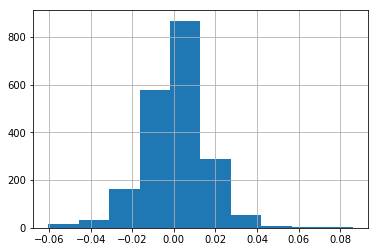

In [22]:
returns['Portfolio'].hist()
plt.show()

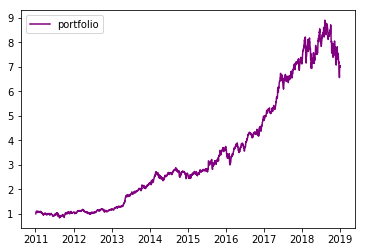

In [23]:
import matplotlib.dates

# Plot the portfolio cumulative returns only
fig, ax = plt.subplots()
ax.plot(daily_cum_ret.index, daily_cum_ret.Portfolio, color='purple', label="portfolio")
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
plt.legend()
plt.show()

In [24]:
# Print the mean
print("mean : ", returns['Portfolio'].mean()*100)

# Print the standard deviation
print("Std. dev: ", returns['Portfolio'].std()*100)

# Print the skewness
print("skew: ", returns['Portfolio'].skew())

# Print the kurtosis
print("kurt: ", returns['Portfolio'].kurtosis())

mean :  0.1082730911582257
Std. dev:  1.4933190936486973
skew:  -0.0083514818259151
kurt:  2.4025799921222566


In [25]:
# Calculate the standard deviation by taking the square root
port_standard_dev = np.sqrt(np.dot(weights.T, np.dot(weights, cov_matrix)))

# Print the results 
print(str(np.round(port_standard_dev, 4) * 100) + '%')

23.61%


In [26]:
# Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))

# Print the result
print(str(np.round(port_variance, 4) * 100) + '%')

5.58%


In [27]:
# Calculate total return and annualized return from price data 
total_return = (returns['Portfolio'][-1] - returns['Portfolio'][0]) / returns['Portfolio'][0]

# Annualize the total return over 5 year 
annualized_return = ((total_return + 1)**(1/5))-1

In [28]:
# Calculate annualized volatility from the standard deviation
vol_port = returns['Portfolio'].std() * np.sqrt(250)

In [29]:
# Calculate the Sharpe ratio 
rf = 0.01
sharpe_ratio = ((annualized_return - rf) / vol_port)
print(sharpe_ratio)

-0.9497091484089055


In [30]:
# Create a downside return column with the negative returns only
target = 0
downside_returns = returns.loc[returns['Portfolio'] < target]

# Calculate expected return and std dev of downside
expected_return = returns['Portfolio'].mean()
down_stdev = downside_returns.std()

# Calculate the sortino ratio
rf = 0.01
sortino_ratio = (expected_return - rf)/down_stdev

# Print the results
print("Expected return: ", expected_return*100)
print('-' * 50)
print("Downside risk:")
print(down_stdev*100)
print('-' * 50)
print("Sortino ratio:")
print(sortino_ratio)

Expected return:  0.1082730911582257
--------------------------------------------------
Downside risk:
GOOGL        1.199141
MSFT         1.320949
NVDA         2.013994
TSLA         2.454544
Portfolio    1.037424
dtype: float64
--------------------------------------------------
Sortino ratio:
GOOGL       -0.743638
MSFT        -0.675065
NVDA        -0.442765
TSLA        -0.363296
Portfolio   -0.859559
dtype: float64


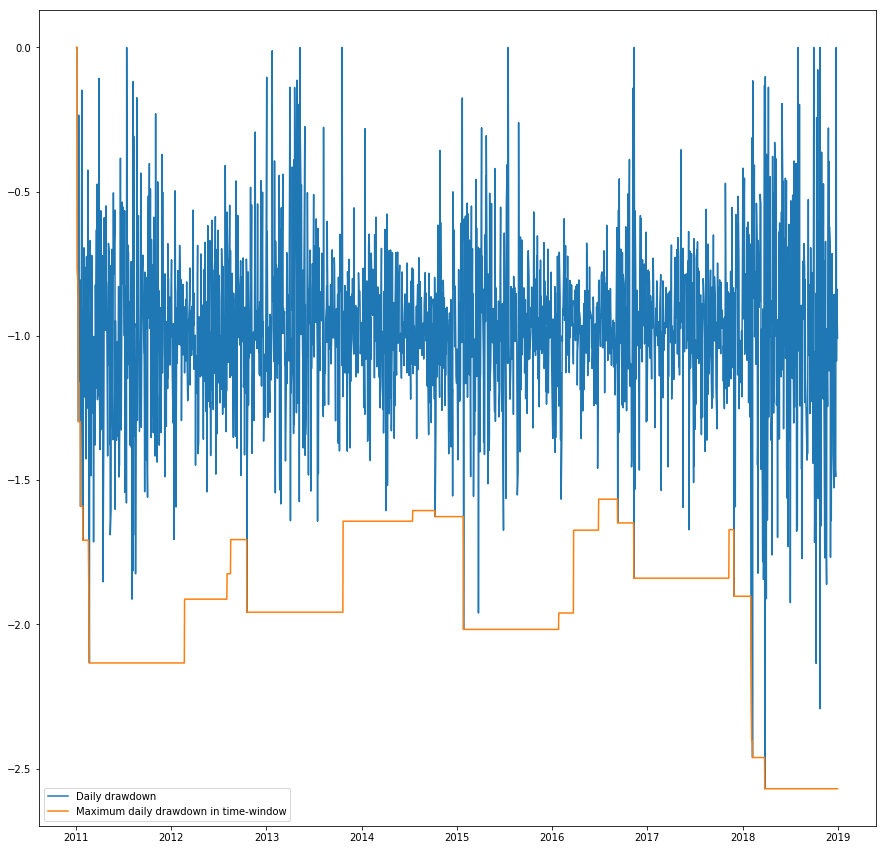

In [31]:
# Calculate the max value 
roll_max = returns['Portfolio'].rolling(center=False,min_periods=1,window=252).max()

# Calculate the daily draw-down relative to the max
daily_draw_down = returns['Portfolio']/roll_max - 1.0

# Calculate the minimum (negative) daily draw-down
max_daily_draw_down = daily_draw_down.rolling(center=False,min_periods=1,window=252).min()

# Plot the results
plt.figure(figsize=(15,15))
plt.plot(returns.index, daily_draw_down, label='Daily drawdown')
plt.plot(returns.index, max_daily_draw_down, label='Maximum daily drawdown in time-window')
plt.legend()
plt.show()

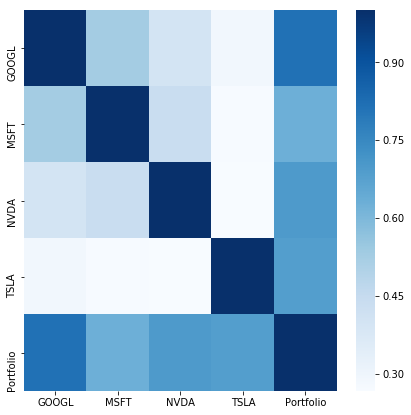

In [32]:
plt.figure(figsize=(7,7))
corr = returns.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Blues")

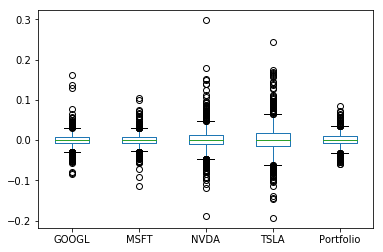

In [33]:
# Box plot
returns.plot(kind='box')

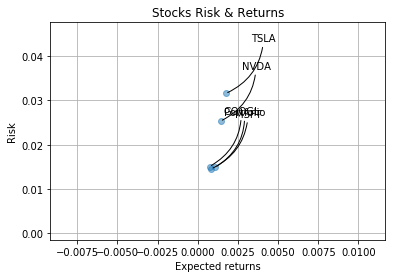

In [34]:
rets = returns.dropna()

plt.scatter(rets.mean(), rets.std(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

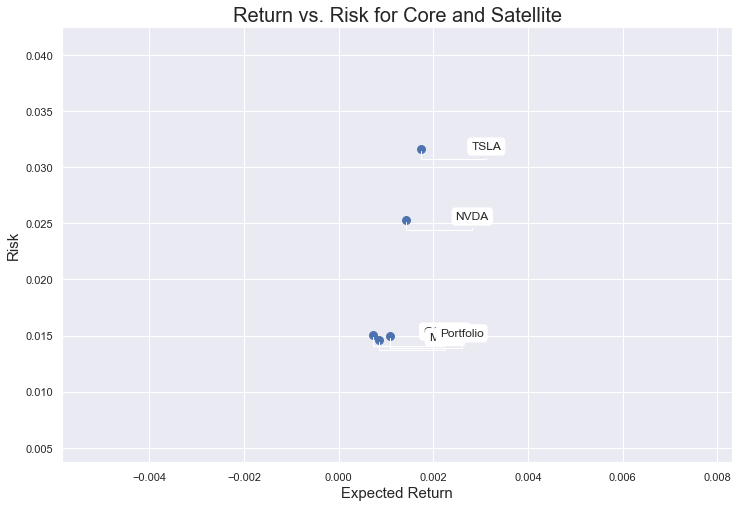

In [35]:
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Core and Satellite", fontsize=20)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [36]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risk:")
print(rets.std())

Stock returns: 
GOOGL        0.000729
MSFT         0.000849
NVDA         0.001416
TSLA         0.001749
Portfolio    0.001083
dtype: float64
--------------------------------------------------
Stock risk:
GOOGL        0.015087
MSFT         0.014583
NVDA         0.025336
TSLA         0.031572
Portfolio    0.014933
dtype: float64


In [37]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
GOOGL,0.000729,0.015087
MSFT,0.000849,0.014583
Portfolio,0.001083,0.014933
NVDA,0.001416,0.025336
TSLA,0.001749,0.031572


In [38]:
table.sort_values(by='Risk')

,Returns,Risk
MSFT,0.000849,0.014583
Portfolio,0.001083,0.014933
GOOGL,0.000729,0.015087
NVDA,0.001416,0.025336
TSLA,0.001749,0.031572


In [39]:
table['Sharpe_Ratio'] = (table['Returns'] / table['Risk']) * np.sqrt(252)
table

,Returns,Risk,Sharpe_Ratio
GOOGL,0.000729,0.015087,0.767509
MSFT,0.000849,0.014583,0.924273
NVDA,0.001416,0.025336,0.887340
TSLA,0.001749,0.031572,0.879580
Portfolio,0.001083,0.014933,1.150981
